First I'm going to define the functions we will be calling later:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


def fast_sum(a, b, c, x, y, z, Vo, array):
    """
    Calculates the potential at a point.
    :param a: x-coordinate bound of box
    :param b: y-coordinate bound of box
    :param c: z-coordinate bound of box
    :param x: x-coordinate location of point at which potential is taken
    :param y: y-coordinate location of point at which potential is taken
    :param z: z-coordinate location of point at which potential is taken
    :param Vo: potential maintained at lid relative to other sides
    :param array: calculated array of m and n values to be used for double sum
    :return: potential inside box at given position
    """
    sum = 0
    for item in array: # performing double sum
        m, n = item
        sum += (1 / (m * n)) * np.sin((m * np.pi * x) / a) * np.sin((n * np.pi * y) / b) * np.sinh(
            np.pi * np.sqrt(np.square(m) / np.square(a) + np.square(n) / np.square(b))) * z * (
                       1 / (np.sinh(np.pi * np.sqrt(np.square(m) / np.square(a) + np.square(n) / np.square(b))) * c))

    return sum * 16 * Vo * (1 / (np.square(np.pi))) # muliplying at end of sum


def stop_sum(a, b, c, x, y, z, Vo, array, stop=None):
    # attempted code to stop sum at 10^-6
    contrib_amount = 5000000
    m = 1
    n = 1
    while contrib_amount > stop:
        sum_list = []
        while contrib_amount > stop:
            Ymn = np.pi * np.sqrt(np.square(m) / np.square(a) + np.square(n) / np.square(b))
            contrib_amount += (1 / (m * n)) * np.sin((m * np.pi * x) / a) * np.sin((n * np.pi * y) / b) * np.sinh(Ymn) * z * (
                                1 / (np.sinh(Ymn) * c)) * 16 * Vo * (1 / (np.square(np.pi)))
            n += 2
        sum_list.append(contrib_amount)




def calc_pot_x(xmin, xmax, step, y, z, a, b, c, Vo, array, stop=None):
    """
    calculates the potential as function of x along the specified yz intersection
    :param xmin: minimum value of x for which potential is to be calculated (in cm)
    :param xmax: maximum value of x for which potential is to be calculated (in cm)
    :param step: step size of dx (in cm)
    :param y: value of y for which potential is to be calculated (in cm)
    :param z: value of z for which potential is to be calculated (in cm)
    :param a: boundary of box along the x-axis (in cm)
    :param b: boundary of box along the y-axis (in cm)
    :param c: boundary of box along the z-axis (in cm)
    :param Vo: potential of lid of box (in V)
    :param array: calculated array of m and n values to be used for double sum
    :return v_array: array containing calculated potential values
    :return x_coord_array: array containing position of calculated potentials along x-axis
    :return y_coord_array: array containing position of calculated potentials along y-axis
    """
    if stop == None: # Selecting which sum function to use
        v_list = []
        x_coord_list = []
        y_coord_list = []
        for x in np.arange(xmin, xmax + step, step): # calling sum for each point along x axis
            v_list.append(fast_sum(a, b, c, x, y, z, Vo, array))
            x_coord_list.append(x)
            y_coord_list.append(y)
        v_array = np.array(v_list)
        x_coord_array = np.array(x_coord_list)
        y_coord_array = np.array(y_coord_list)
        return v_array, x_coord_array, y_coord_array # saving potentials to arrays
    else:
        v_list = []
        x_coord_list = []
        y_coord_list = []
        for x in np.arange(xmin, xmax + step, step):
            v_list.append(stop_sum(a, b, c, x, y, z, Vo, array, stop))
            x_coord_list.append(x)
            y_coord_list.append(y)
        v_array = np.array(v_list)
        x_coord_array = np.array(x_coord_list)
        y_coord_array = np.array(y_coord_list)
        return v_array, x_coord_array, y_coord_array


def calc_pot_xy(xmin, xmax, ymin, ymax, step, z, a, b, c, Vo, array, stop=None, hush=False):
    """
    Calculates potential along the xy plane at a specific value of z
    :param xmin: minimum value of x for which potential is to be calculated (in cm)
    :param xmax: maximum value of x for which potential is to be calculated (in cm)
    :param ymin: minimum value of y for which potential is to be calculated (in cm)
    :param ymax: maximum value of y for which potential is to be calculated (in cm)
    :param step: step size of dx and dy (in cm)
    :param z: value of z for which potential is to be calculated (in cm)
    :param a: boundary of box along the x-axis (in cm)
    :param b: boundary of box along the y-axis (in cm)
    :param c: boundary of box along the z-axis (in cm)
    :param Vo: potential of lid of box (in V)
    :param array: calculated array of m and n values to be used for double sum
    :return x_array: array containing position of calculate potentials along x-axis
    :return y_array: array containing position of calculate potentials along y-axis
    :return v_array: array containing calculated potential values
    """
    x_list = []
    y_list = []
    v_list = []
    if hush == True:
        for y_num in np.arange(ymin, ymax + step, step): # calling calc_pot_x for each point along y
            [z_pos, x, y] = calc_pot_x(xmin, xmax, step, y_num, z, a, b, c, Vo, array, stop)
            x_list.append(x)
            y_list.append(y)
            v_list.append(z_pos)
        x_array = (np.array(x_list) * 1 / (step * 0.01)).astype(int)
        y_array = (np.array(y_list) * 1 / (step * 0.01)).astype(int)
        v_array = np.array(v_list)
        return x_array, y_array, v_array # saving potential and position data
    else:
        for y_num in tqdm(np.arange(ymin, ymax + step, step)):
            [z_pos, x, y] = calc_pot_x(xmin, xmax, step, y_num, z, a, b, c, Vo, array, stop)
            x_list.append(x)
            y_list.append(y)
            v_list.append(z_pos)
        x_array = (np.array(x_list) * 1 / (step * 0.01)).astype(int)
        y_array = (np.array(y_list) * 1 / (step * 0.01)).astype(int)
        v_array = np.array(v_list)
        return x_array, y_array, v_array


def create_sum_array(nm="None", cf="None"):
    """
    Creates array of n and m values to be used for double summation operations
    :param nm: maximum n and m value to calculate
    :param cf: maximum Fourier coefficient to calculate
    :return: calculated 2-D array containing n and m values four double summation
    """
    if (nm is None) and (cf is None): # determining if input data is n=n value or fourier coefficient
        return None
    elif nm is not None:
        array = []
        for m in np.arange(1, nm + 1, 2): # calculating array to represent double sum
            for n in np.arange(1, nm + 1, 2):
                array.append([m, n])
        return array 
    else:
        array = []
        for m in np.arange(1, cf * 2, 2):
            for n in np.arange(1, cf * 2, 2):
                array.append([m, n])
        return array


def calc_points(step, xmin, xmax, ymin, ymax, zmin, zmax, a, b, c, Vo, array, stop=None):
    """
    calculates potential within defined boundaries in three dimensions
    :param step: step size of dx dy and dz (in cm)
    :param xmin: minimum position on x-axis (in cm)
    :param xmax: maximum position on x-axis (in cm)
    :param ymin: minimum position on y-axis (in cm)
    :param ymax: maximum position on y-axis (in cm)
    :param zmin: minimum position on z-axis (in cm)
    :param zmax: maximum position on z-axis (in cm)
    :param a: boundary of box on x-axis (in cm)
    :param b: boundary of box on y-axis (in cm)
    :param c: boundary of box on z-axis (in cm)
    :param Vo: potential at lid of box (in V)
    :param array: calculated array values for double sum
    :param stop: minimum potential sum to stop for double sum
    :return: array in each dimension corresponding to grid
    """
    x_list = []
    y_list = []
    z_list = []
    v_list = []
    for z in tqdm(np.arange(zmin, zmax + step, step)): # calling calc_pot_xy for each point along z
        [x, y, v] = calc_pot_xy(xmin, xmax, ymin, ymax, step, z, a, b, c, Vo, array, stop, hush=True)
        x_list.append(x)
        y_list.append(y)
        z_list.append(z)
        v_list.append(v)
    return np.asarray(x_list), np.asarray(y_list), np.asarray(z_list), np.asarray(v_list) # Saving potential data


Now that we have all of our functions defined we can start calling them to tackle the problem.

Our first operation is to calculate the potential from 0cm to 10cm along a point on the yz axis. My first step was to write a function to perform the double sum operation to calculate the potential at any given point. This function ended up being fast_sum. Next I created a function to create an array containing potentials along a specific yz axis. This function was calc_pot_x. Calc_pot_x calls fast_sum, appending its output to an array to store the values.

Let's call calc_pot_x for the first five fourier coefficients and add it to a plot:

In [2]:
array = create_sum_array(None, 5)

I chose to calculate the coefficients and store them in an array before the double sum calculation as this is more efficient then re-calculating the same array over and over.

Text(0.5, 1.0, 'Potential as a Function of Position Calculated With 5 Fourier Coefficients')

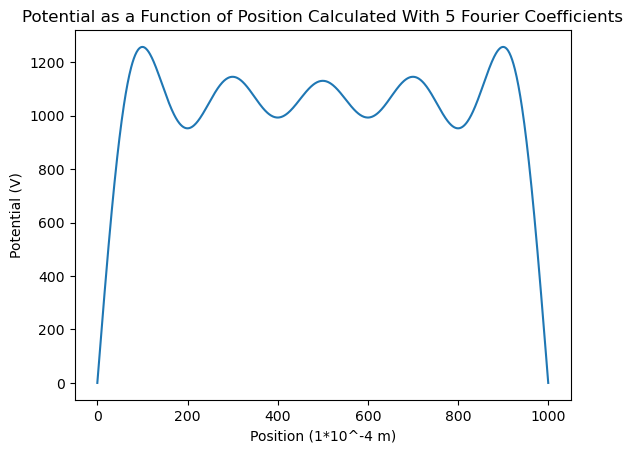

In [3]:
fig, ax = plt.subplots()
plt.plot(calc_pot_x(0, 10, 0.01, 5, 10, 10, 10, 10, 1000, array)[0])
plt.ylabel("Potential (V)")
plt.xlabel("Position (1*10^-4 m)")
plt.title("Potential as a Function of Position Calculated With 5 Fourier Coefficients")

Now let's do the same thing but with the first 25 fourier coefficients

Text(0.5, 1.0, 'Potential as a Function of Position Calculated With 25 Fourier Coefficients')

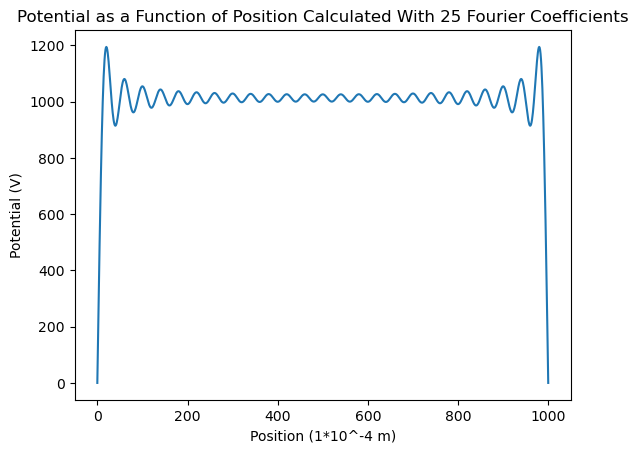

In [4]:
array = create_sum_array(None, 25)
plt.plot(calc_pot_x(0, 10, 0.01, 5, 10, 10, 10, 10, 1000, array)[0])
plt.ylabel("Potential (V)")
plt.xlabel("Position (1*10^-4 m)")
plt.title("Potential as a Function of Position Calculated With 25 Fourier Coefficients")

As you can see with more fourier coefficients our graph looks closer to what we might expect from a potential in a box. Let's graph the two arrays together to compare.

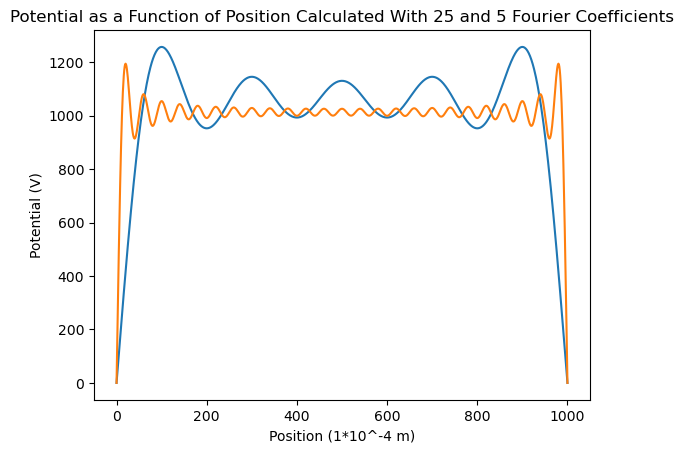

In [5]:
fig, ax = plt.subplots()
plt.plot(calc_pot_x(0, 10, 0.01, 5, 10, 10, 10, 10, 1000, create_sum_array(None, 5))[0])
plt.plot(calc_pot_x(0, 10, 0.01, 5, 10, 10, 10, 10, 1000, create_sum_array(None, 25))[0])
plt.ylabel("Potential (V)")
plt.xlabel("Position (1*10^-4 m)")
plt.title("Potential as a Function of Position Calculated With 25 and 5 Fourier Coefficients")
plt.show()

We can see the graph with fewer coefficients seems to "flatten" near the top at a higher voltage, and the voltage does not drop so steeply at the sides compared to the graph with the greater fourier coefficients.

Next we must calculate and display the potential within the box at a z-height of 5cm across the xy plane. We can calculate this by arranging our array from the previous problem within a larger array. This creates a two dimensional array with which we can store calculated potential values for specific positions.

This process was accomplished with the calc_pot_xy function. Again pre-calculating our input array we can call calc_pot_xy at a specific z-height to get an array of potentials across the z plane at that height.

In [6]:
array = create_sum_array(None, 10)
[x, y, z] = calc_pot_xy(0, 10, 0, 10, 0.01, 5, 10, 10, 10, 1000, array)

100%|██████████████████████████████████████████████████████████████████████████████| 1001/1001 [03:18<00:00,  5.05it/s]


Now that we have our 2D array created, we can plot it along the plane z=5 as a collection of equipotential lines on a contour plot.

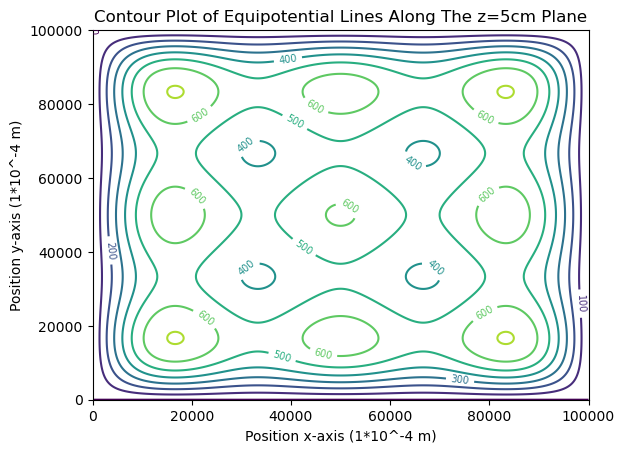

In [7]:
CS = plt.contour(x, y, z)
plt.title("Contour Plot of Equipotential Lines Along The z=5cm Plane")
plt.ylabel("Position y-axis (1*10^-4 m)")
plt.xlabel("Position x-axis (1*10^-4 m)")
plt.clabel(CS, fontsize=7, inline=True)
plt.show()